1 РАЗДЕЛ
Обновление библиотек, загрузка данных, чистка данных, изучение данных

In [1]:
# Импорт библиотек

import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
from datetime import date,timedelta

In [2]:
#загрузка датафрейма
df = pd.read_csv('songs_normalize.csv')

In [3]:
#вывод таблицы для ознакомения с ней
df

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


*artist: Имя исполнителя.
* song: (песня): Название трека.
* duration_ms: Длительность трека в миллисекундах.
* explicit: (явный, слишком откровенный): Текст или содержание песни или музыкального видео содержат один или несколько критериев, которые могут быть сочтены оскорбительными или неподходящими для детей.
* year: Год выпуска трека.
* popularity (популярность): Чем выше значение, тем популярнее песня.
*  danceability (Танцевальность): Танцевальность описывает, насколько трек подходит для танцев на основе комбинации музыкальных элементов, включая темп, стабильность ритма, силу бита и общую регулярность. Значение 0,0 — наименее танцевальное, а 1,0 — наиболее танцевальное.
* energy (энергия): Энергия является мерой от 0,0 до 1,0 и представляет собой перцептивную (процесс отражения событий) меру интенсивности и активности.
* key: (ключ) Тональность, в которой находится трек.. Если ключ не обнаружен, значение равно -1.
* loudness: (громкость) Общая громкость трека в децибелах (дБ). Значения громкости усредняются по всей дорожке и полезны для сравнения относительной громкости дорожек. Громкость – это качество звука, которое является первичным психологическим коррелятом физической силы (амплитуды). Значения обычно находятся в диапазоне от -60 до 0 дБ.
* mode: (модальность) Mode указывает модальность (мажорную или минорную) трека, тип гаммы, из которой получено его мелодическое содержание. Мажор обозначается цифрой 1, а минор — 0.
* Speechiness: (определяет наличие произнесенных слов в треке). Чем больше запись похожа исключительно на речь (например, ток-шоу, аудиокнига, поэзия), тем ближе к 1.0 значение атрибута. Значения выше 0,66 описывают треки, которые, вероятно, полностью состоят из произнесенных слов. Значения от 0,33 до 0,66 описывают треки, которые могут содержать как музыку, так и речь, как в разделах, так и в слоях, включая такие случаи, как рэп-музыка. Значения ниже 0,33, скорее всего, представляют музыку и другие треки, не похожие на речь.
* acousticness (Акустическость) Достоверная мера от 0.0 до 1.0 того, является ли трек акустическим. 1.0 означает высокую уверенность в том, что трек является акустическим.
* instrumentalness (инструментальность): предсказывает, содержит ли трек вокал. Звуки «ох» и «ааа» в этом контексте рассматриваются как инструментальные. Рэп или треки с устной речью явно «вокальные». Чем ближе значение инструментальности к 1.0, тем больше вероятность того, что трек не содержит вокального контента. Значения выше 0,5 предназначены для представления инструментальных треков, но достоверность тем выше, чем ближе значение к 1,0.
* liveness: Определяет присутствие аудитории в записи. Более высокие значения живости означают повышенную вероятность того, что трек был исполнен в прямом эфире. Значение выше 0,8 обеспечивает высокую вероятность того, что трек находится в прямом эфире.
* valence (валентность): Мера от 0,0 до 1,0, описывающая музыкальную позитивность, передаваемую треком. Треки с высокой валентностью звучат более позитивно (например, счастливый, веселый, эйфорический), в то время как треки с низкой валентностью звучат более негативно (например, грустный, подавленный, сердитый).
эйфорический), в то время как треки с низкой валентностью звучат более негативно (например, грустный, подавленный, сердитый).
* tempo: Общий расчетный темп трека в ударах в минуту (BPM). В музыкальной терминологии темп — это скорость или темп данного произведения, который напрямую зависит от средней длительности удара.
* genre: Жанр трека.



In [4]:
#информация о датасете
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   artist            2000 non-null   object 
 1   song              2000 non-null   object 
 2   duration_ms       2000 non-null   int64  
 3   explicit          2000 non-null   bool   
 4   year              2000 non-null   int64  
 5   popularity        2000 non-null   int64  
 6   danceability      2000 non-null   float64
 7   energy            2000 non-null   float64
 8   key               2000 non-null   int64  
 9   loudness          2000 non-null   float64
 10  mode              2000 non-null   int64  
 11  speechiness       2000 non-null   float64
 12  acousticness      2000 non-null   float64
 13  instrumentalness  2000 non-null   float64
 14  liveness          2000 non-null   float64
 15  valence           2000 non-null   float64
 16  tempo             2000 non-null   float64


In [5]:
#типы данных 
df.dtypes

artist               object
song                 object
duration_ms           int64
explicit               bool
year                  int64
popularity            int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
genre                object
dtype: object

In [6]:
#вывести количество строк и столбцов
df.shape

(2000, 18)

In [7]:
#просмотр уникальных названий песен
df.song.nunique()

1879

видим, что количество строк 2000, а количество песен 1879, значит есть дубикаты

In [8]:
#удаляем дубликаты
df1=df.drop_duplicates(subset=['song'])
df1

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
1,blink-182,All The Small Things,167066,False,1999,79,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726,"rock, pop"
2,Faith Hill,Breathe,250546,False,1999,66,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859,"pop, country"
3,Bon Jovi,It's My Life,224493,False,2000,78,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992,"rock, metal"
4,*NSYNC,Bye Bye Bye,200560,False,2000,65,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656,pop
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,Jonas Brothers,Sucker,181026,False,2019,79,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958,pop
1996,Taylor Swift,Cruel Summer,178426,False,2019,78,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994,pop
1997,Blanco Brown,The Git Up,200593,False,2019,69,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984,"hip hop, country"
1998,Sam Smith,Dancing With A Stranger (with Normani),171029,False,2019,75,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998,pop


In [9]:
#Посмотреть, сколько записей для каждой из artist
df1.artist.value_counts()

artist
Rihanna            22
Drake              20
Calvin Harris      20
Eminem             19
Britney Spears     19
                   ..
The Kooks           1
Plain White T's     1
Ida Corr            1
Alex Gaudino        1
Blanco Brown        1
Name: count, Length: 823, dtype: int64

Самое большое количество песен у Рианны, посмотрим подробнее датасет по ее данным

In [10]:
#Создать датафрейм Rihanna с данными только где artist=’Rihanna’
Rihanna = df1.query("artist == 'Rihanna'") 

In [11]:
#просмотр нового датафрейма
Rihanna.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
503,Rihanna,Pon de Replay,246960,False,2005,77,0.779,0.640,7,-8.415,1,0.1590,0.000155,0.000770,0.1010,0.498,99.019,"hip hop, pop, R&B"
605,Rihanna,SOS,238920,False,2006,73,0.677,0.671,7,-4.905,1,0.0361,0.004000,0.000051,0.4130,0.527,137.046,"hip hop, pop, R&B"
648,Rihanna,Unfaithful,226973,False,2006,70,0.588,0.391,0,-8.607,0,0.0334,0.839000,0.000000,0.2270,0.349,144.069,"hip hop, pop, R&B"
701,Rihanna,Umbrella,275986,False,2008,81,0.583,0.829,1,-4.603,1,0.1340,0.008640,0.000000,0.0426,0.575,174.028,"hip hop, pop, R&B"
726,Rihanna,Shut Up And Drive,212280,False,2008,69,0.735,0.826,1,-4.902,1,0.0349,0.001010,0.129000,0.1970,0.740,132.964,"hip hop, pop, R&B"


In [12]:
#Посмотреть, в каких песнях Рианы самая продолжительная длина трека  
Rihanna.groupby('song', as_index=False).aggregate({'duration_ms':'max'}).sort_values('duration_ms', ascending=False)


,song,duration_ms
17,Umbrella,275986
3,Don't Stop The Music,267080
5,Man Down,267000
20,What's My Name?,263173
4,Hard,250600
8,Pon de Replay,246960
11,S&M,243533
21,Where Have You Been,242680
14,Stay,240706
12,SOS,238920


In [13]:
#аналогичную группировку для popularity (какая песня самая популярная у Рианы)
Rihanna.groupby('song', as_index=False).aggregate({'popularity':'max'}).sort_values('popularity', ascending=False)

,song,popularity
17,Umbrella,81
6,Needed Me,80
3,Don't Stop The Music,77
8,Pon de Replay,77
2,Disturbia,76
14,Stay,76
19,We Found Love,75
1,Diamonds,75
15,Take A Bow,74
9,Rude Boy,74


In [14]:
#в каком году у Рианы песня самая популярная. Какая продолжительность этого трека (песни), какая танцевальность у этой песни?

In [15]:
#создадим новый  датафрейм с интерисующими нас колонками
popular_song = Rihanna[['song', 'popularity', 'year', 'duration_ms', 'danceability']]
popular_song

,song,popularity,year,duration_ms,danceability
503,Pon de Replay,77,2005,246960,0.779
605,SOS,73,2006,238920,0.677
648,Unfaithful,70,2006,226973,0.588
701,Umbrella,81,2008,275986,0.583
726,Shut Up And Drive,69,2008,212280,0.735
802,Take A Bow,74,2008,229413,0.697
811,Disturbia,76,2008,238626,0.707
819,Don't Stop The Music,77,2008,267080,0.835
935,Russian Roulette,64,2009,227533,0.480
1007,Only Girl (In The World),73,2010,235493,0.789


In [16]:
# какое значение популярности самое большое у песен Рианны
popular_song.popularity.max()

81

In [17]:
#выведем строку из созданной ранее таблицы popular_song со значением popularity=81 и увидим данные самой популяной песни Рианны, год ее выпуска, продолжительностьтрека, танцевальность трека.
popular_song.query("popularity == 81")

,song,popularity,year,duration_ms,danceability
701,Umbrella,81,2008,275986,0.583


In [18]:
#как зависит уровень популярности песен Рианны касательно годов
Rihanna_year = Rihanna.groupby('year', as_index=False).aggregate({'popularity':'max'}).sort_values('popularity', ascending=False)
Rihanna_year 

,year,popularity
2,2008,81
8,2016,80
0,2005,77
6,2012,76
5,2011,75
3,2009,74
1,2006,73
4,2010,73
7,2015,73


In [19]:
#как зависит уровень популярности песен Рианны от танцевальности
Rihanna_danceability = Rihanna.groupby('danceability', as_index=False).aggregate({'popularity':'max'}).sort_values('popularity', ascending=False)
Rihanna_danceability

,danceability,popularity
6,0.583,81
9,0.671,80
20,0.835,77
17,0.779,77
13,0.707,76
8,0.621,76
4,0.564,75
15,0.735,75
3,0.563,74
12,0.697,74


Проанализируем топ-5 самых популярных исполнителей (по частоте встречаемости)

In [20]:
# вывести топ-5 (по распространенности) исполнителей
df1.artist.value_counts()

artist
Rihanna            22
Drake              20
Calvin Harris      20
Eminem             19
Britney Spears     19
                   ..
The Kooks           1
Plain White T's     1
Ida Corr            1
Alex Gaudino        1
Blanco Brown        1
Name: count, Length: 823, dtype: int64

In [21]:
#Создать датафрейм Max_popular_aLLsong с данными только где artist= Rihanna, Drake, Eminem, Calvin Harris, Britney Spears
aLLsong = df1.query("artist == 'Rihanna' or artist == 'Drake' or  artist == 'Eminem' or artist == 'Calvin Harris' or artist == 'Britney Spears'")
aLLsong.head(5)

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
0,Britney Spears,Oops!...I Did It Again,211160,False,2000,77,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053,pop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.000000,0.0454,0.760,104.504,hip hop
34,Britney Spears,Born to Make You Happy,243533,False,1999,58,0.633,0.922,11,-4.842,0,0.0454,0.1160,0.000465,0.0710,0.686,84.110,pop
98,Britney Spears,Lucky,206226,False,2000,65,0.765,0.791,8,-5.707,1,0.0317,0.2620,0.000154,0.0669,0.966,95.026,pop
102,Eminem,Stan,404106,True,2000,83,0.780,0.768,6,-4.325,0,0.2380,0.0371,0.000002,0.5180,0.507,80.063,hip hop


In [22]:
#среди топ 5 самых распостраненных исполнителей выбрать самое большое значение популярности их песни
top5_popular = aLLsong \
        .groupby(['artist'], as_index=False) \
        .aggregate({'popularity': 'max'}) \
        .query("artist == 'Rihanna' or artist == 'Drake' or  artist == 'Eminem' or artist == 'Calvin Harris' or artist == 'Britney Spears'") \
        .sort_values('popularity', ascending=False) 
top5_popular

,artist,popularity
3,Eminem,87
2,Drake,84
0,Britney Spears,81
1,Calvin Harris,81
4,Rihanna,81


In [23]:
#вывести все известные данные о самой известной песне топ-5 исполнителей
Max_popular_Eminem = aLLsong \
        .query("popularity == 87") \
        .query ("artist == 'Eminem'")
Max_popular_Drake = aLLsong \
        .query("popularity == 84") \
        .query ("artist == 'Drake'")
Max_popular_Britney_Spears = aLLsong \
        .query("popularity == 81") \
        .query ("artist == 'Britney Spears'")
Max_popular_Calvin_Harris = aLLsong \
        .query("popularity == 81") \
        .query ("artist == 'Calvin Harris'")
Max_popular_Rihanna = aLLsong \
        .query("popularity == 81") \
        .query ("artist == 'Rihanna'")

In [24]:
Max_popular_Eminem

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.0,0.237,0.662,112.238,hip hop


In [25]:
Max_popular_Drake

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1601,Drake,One Dance,173986,False,2016,84,0.792,0.625,1,-5.609,1,0.0536,0.00776,0.0018,0.329,0.37,103.967,"hip hop, pop, R&B"


In [26]:
Max_popular_Britney_Spears

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
402,Britney Spears,Toxic,198800,False,2003,81,0.774,0.838,5,-3.914,0,0.114,0.0249,0.025,0.242,0.924,143.04,pop


In [27]:
Max_popular_Calvin_Harris


,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1812,Calvin Harris,One Kiss (with Dua Lipa),214846,False,2018,81,0.791,0.862,9,-3.24,0,0.11,0.037,0.000022,0.0814,0.592,123.994,"hip hop, pop, Dance/Electronic"


In [28]:
Max_popular_Rihanna

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
701,Rihanna,Umbrella,275986,False,2008,81,0.583,0.829,1,-4.603,1,0.134,0.00864,0.0,0.0426,0.575,174.028,"hip hop, pop, R&B"


In [29]:
#с помощью функция .iloc выберем строки со всеми столбцами самых популярных песнен топ-5 самых распостаненных исполнителей

In [30]:
top5_artists = df.iloc[[201,1601,402, 1812, 701]]
top5_artists

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1601,Drake,One Dance,173986,False,2016,84,0.792,0.625,1,-5.609,1,0.0536,0.00776,0.001800,0.3290,0.370,103.967,"hip hop, pop, R&B"
402,Britney Spears,Toxic,198800,False,2003,81,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,pop
1812,Calvin Harris,One Kiss (with Dua Lipa),214846,False,2018,81,0.791,0.862,9,-3.240,0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,"hip hop, pop, Dance/Electronic"
701,Rihanna,Umbrella,275986,False,2008,81,0.583,0.829,1,-4.603,1,0.1340,0.00864,0.000000,0.0426,0.575,174.028,"hip hop, pop, R&B"


In [31]:
#медиана популярности
df1['popularity']. median ()

65.0

РАЗДЕЛ 2 Исследовательский анализ данных 

In [245]:
import pandas as pd
import numpy as np
 
import scipy.stats as ss
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
 
import matplotlib.pyplot as plt
import seaborn as sns

Построение карреляционной матрицы

In [246]:
#выводим числовые столбцы и передаем их в новый датасет
Song = df[['duration_ms', 'popularity', 'duration_ms', 'danceability', 'energy', 'key', 'loudness', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo']]
Song

,duration_ms,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
0,211160,77,211160,0.751,0.834,1,-5.444,0,0.0437,0.3000,0.000018,0.3550,0.894,95.053
1,167066,79,167066,0.434,0.897,0,-4.918,1,0.0488,0.0103,0.000000,0.6120,0.684,148.726
2,250546,66,250546,0.529,0.496,7,-9.007,1,0.0290,0.1730,0.000000,0.2510,0.278,136.859
3,224493,78,224493,0.551,0.913,0,-4.063,0,0.0466,0.0263,0.000013,0.3470,0.544,119.992
4,200560,65,200560,0.614,0.928,8,-4.806,0,0.0516,0.0408,0.001040,0.0845,0.879,172.656
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,181026,79,181026,0.842,0.734,1,-5.065,0,0.0588,0.0427,0.000000,0.1060,0.952,137.958
1996,178426,78,178426,0.552,0.702,9,-5.707,1,0.1570,0.1170,0.000021,0.1050,0.564,169.994
1997,200593,69,200593,0.847,0.678,9,-8.635,1,0.1090,0.0669,0.000000,0.2740,0.811,97.984
1998,171029,75,171029,0.741,0.520,8,-7.513,1,0.0656,0.4500,0.000002,0.2220,0.347,102.998


In [247]:
Song.dtypes

duration_ms           int64
popularity            int64
duration_ms           int64
danceability        float64
energy              float64
key                   int64
loudness            float64
mode                  int64
speechiness         float64
acousticness        float64
instrumentalness    float64
liveness            float64
valence             float64
tempo               float64
dtype: object

In [248]:
#создаем корреляционную матрицу
Song.corr()

,duration_ms,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000000,0.050617,1.000000,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
popularity,0.050617,1.000000,0.050617,-0.003546,-0.014021,0.014823,0.030632,-0.021353,0.021162,0.024619,-0.048059,-0.009856,-0.016142,0.014288
duration_ms,1.000000,0.050617,1.000000,-0.060057,-0.078763,-0.002560,-0.079912,-0.003848,0.066998,0.010923,-0.004208,0.024941,-0.116870,-0.028603
danceability,-0.060057,-0.003546,-0.060057,1.000000,-0.104038,0.032731,-0.033315,-0.067528,0.145590,-0.065429,0.023207,-0.126413,0.403178,-0.173418
energy,-0.078763,-0.014021,-0.078763,-0.104038,1.000000,-0.003446,0.651016,-0.040651,-0.057018,-0.445469,0.037861,0.156761,0.334474,0.153719
key,-0.002560,0.014823,-0.002560,0.032731,-0.003446,1.000000,-0.007474,-0.153182,0.007147,0.002365,-0.008173,-0.033071,0.036977,-0.001431
loudness,-0.079912,0.030632,-0.079912,-0.033315,0.651016,-0.007474,1.000000,-0.028133,-0.076388,-0.310039,-0.104925,0.102159,0.232150,0.080709
mode,-0.003848,-0.021353,-0.003848,-0.067528,-0.040651,-0.153182,-0.028133,1.000000,-0.000077,0.005744,-0.038613,0.025439,-0.074681,0.048434
speechiness,0.066998,0.021162,0.066998,0.145590,-0.057018,0.007147,-0.076388,-0.000077,1.000000,0.000394,-0.062954,0.061172,0.073605,0.057747
acousticness,0.010923,0.024619,0.010923,-0.065429,-0.445469,0.002365,-0.310039,0.005744,0.000394,1.000000,-0.005214,-0.110043,-0.128128,-0.103660


In [249]:
#создаем ту же матрицу корреляции с коэффициентами, округленными до 3 знаков после запятой
Song.corr().round(3)

,duration_ms,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo
duration_ms,1.000,0.051,1.000,-0.060,-0.079,-0.003,-0.080,-0.004,0.067,0.011,-0.004,0.025,-0.117,-0.029
popularity,0.051,1.000,0.051,-0.004,-0.014,0.015,0.031,-0.021,0.021,0.025,-0.048,-0.010,-0.016,0.014
duration_ms,1.000,0.051,1.000,-0.060,-0.079,-0.003,-0.080,-0.004,0.067,0.011,-0.004,0.025,-0.117,-0.029
danceability,-0.060,-0.004,-0.060,1.000,-0.104,0.033,-0.033,-0.068,0.146,-0.065,0.023,-0.126,0.403,-0.173
energy,-0.079,-0.014,-0.079,-0.104,1.000,-0.003,0.651,-0.041,-0.057,-0.445,0.038,0.157,0.334,0.154
key,-0.003,0.015,-0.003,0.033,-0.003,1.000,-0.007,-0.153,0.007,0.002,-0.008,-0.033,0.037,-0.001
loudness,-0.080,0.031,-0.080,-0.033,0.651,-0.007,1.000,-0.028,-0.076,-0.310,-0.105,0.102,0.232,0.081
mode,-0.004,-0.021,-0.004,-0.068,-0.041,-0.153,-0.028,1.000,-0.000,0.006,-0.039,0.025,-0.075,0.048
speechiness,0.067,0.021,0.067,0.146,-0.057,0.007,-0.076,-0.000,1.000,0.000,-0.063,0.061,0.074,0.058
acousticness,0.011,0.025,0.011,-0.065,-0.445,0.002,-0.310,0.006,0.000,1.000,-0.005,-0.110,-0.128,-0.104


In [250]:
#Визуализация матрицы
corr = Song.corr()
corr.style.background_gradient(cmap='coolwarm')

KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'

In [251]:
#Матрица с разными цветами
corr = Song.corr()
corr.style.background_gradient(cmap='RdYlGn')

KeyError: '`Styler.apply` and `.applymap` are not compatible with non-unique index or columns.'

Все коэффициенты корреляции по диагонали таблицы равны 1, потому что каждая переменная совершенна и коррелирует сам с собой.
Все остальные коэффициенты корреляции указывают на корреляцию между различными попарными комбинациями переменных.

линейной связи между переменными не обнаружено


In [260]:
import pandas as pd
import numpy as np
 
import scipy.stats as ss
import statsmodels.formula.api as smf
from statsmodels.stats.api import anova_lm
from statsmodels.stats.multicomp import (pairwise_tukeyhsd,
                                         MultiComparison)
 
 
import matplotlib.pyplot as plt
import seaborn as sns

In [261]:
from scipy import stats

In [262]:
import statsmodels.api as sm

Для наглядности выведем среднее значение, дисперсию, медиану и т.д. в разрезе каждого исполнителя


In [263]:
df.groupby('artist').agg({'popularity': ['mean', 'var', 'std', 'median']}).sort_values('artist')

popularity                              
                  mean         var        std median
artist                                              
*NSYNC            55.0   83.333333   9.128709   55.0
112               60.0   18.000000   4.242641   60.0
2 Chainz          70.0    2.000000   1.414214   70.0
21 Savage         76.0    8.000000   2.828427   76.0
2Pac              62.5   60.500000   7.778175   62.5
...                ...         ...        ...    ...
girl in red       82.0         NaN        NaN   82.0
iann dior         70.5    4.500000   2.121320   70.5
iio               54.0         NaN        NaN   54.0
t.A.T.u.          39.0         NaN        NaN   39.0
will.i.am         63.5  179.666667  13.403980   65.0

[835 rows x 4 columns]

возьмем explicit

In [264]:
df.groupby('explicit').agg({'popularity': ['mean', 'var', 'std', 'median']}).sort_values('explicit')

popularity                              
               mean         var        std median
explicit                                         
False     59.259489  465.217149  21.568893   65.0
True      61.484574  426.086580  20.641865   67.0

Графики

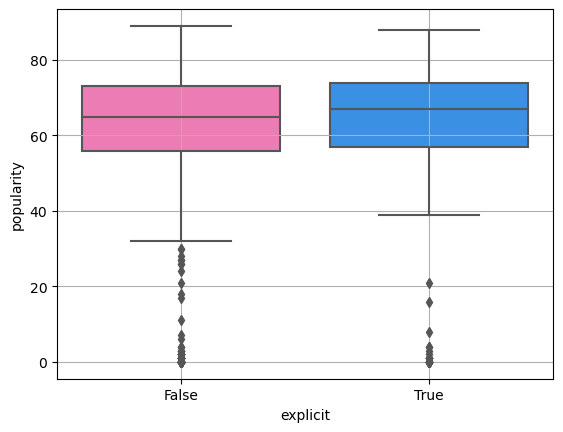

In [274]:
sns.boxplot(x="explicit", y="popularity", data=df, palette=["hotpink", "dodgerblue"]) # для наглядности результатов
plt.grid(True)

In [267]:
# Line Chart

In [361]:
df_plot = df1.groupby('year').agg({'song': 'count'}).reset_index()

<Axes: xlabel='year'>

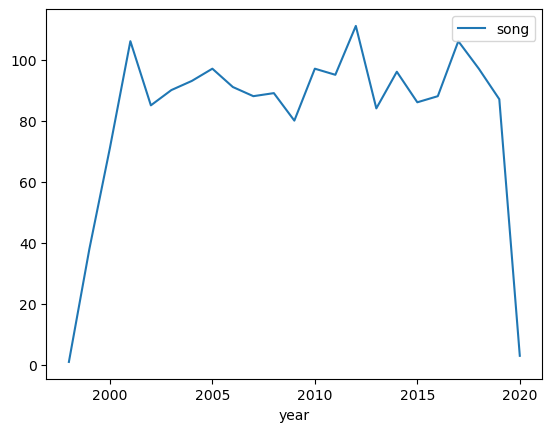

In [362]:
#Line Chart количество песен по годам
df_plot.plot(kind = 'line', x='year', y = 'song')

In [363]:
total_song = df1.groupby('artist',as_index=False).count().sort_values(by='song',ascending=False)
total_song 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
618,Rihanna,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22,22
216,Drake,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
126,Calvin Harris,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20,20
117,Britney Spears,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
236,Eminem,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19,19
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
391,Kent Jones,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
70,B Young,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
73,BLACKPINK,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
386,Kehlani,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1


Pie Chart по показателю "откровенный"

<Axes: title={'center': 'Bar Chart by explicit'}, ylabel='count'>

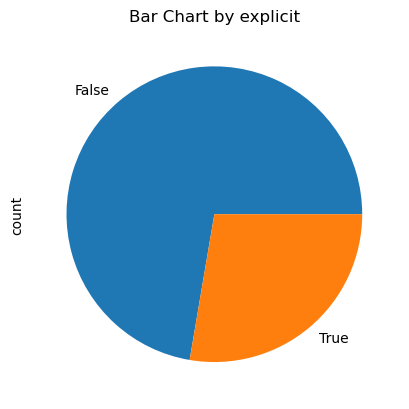

In [364]:
df1['explicit'].value_counts().plot(kind='pie',  title="Bar Chart by explicit")

In [365]:
px.box(df1,x='explicit',y='popularity'

SyntaxError: incomplete input (248475695.py, line 1)

Histogram 
частота встечаемости песен в разрезе годов

<Axes: >

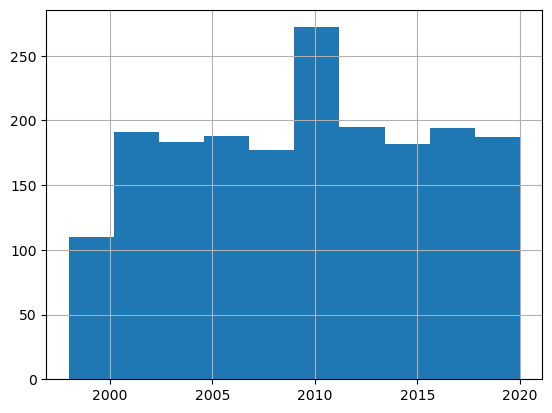

In [366]:
df1['year'].hist()

<Axes: xlabel='key', ylabel='count'>

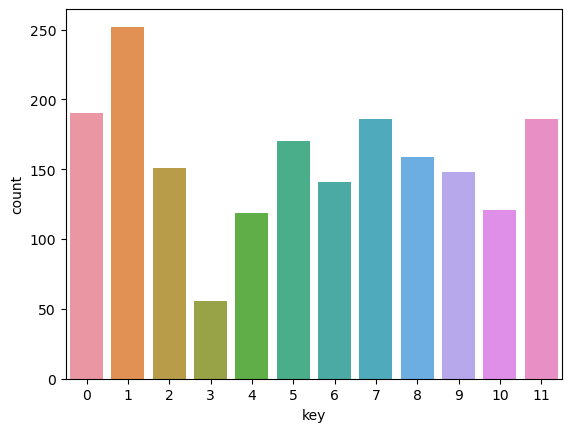

In [367]:
#график подсчета тональности (key), в кот находятся треки
sns.countplot(x='key',data=df1)

In [368]:
Rihanna_year

,year,popularity
2,2008,81
8,2016,80
0,2005,77
6,2012,76
5,2011,75
3,2009,74
1,2006,73
4,2010,73
7,2015,73


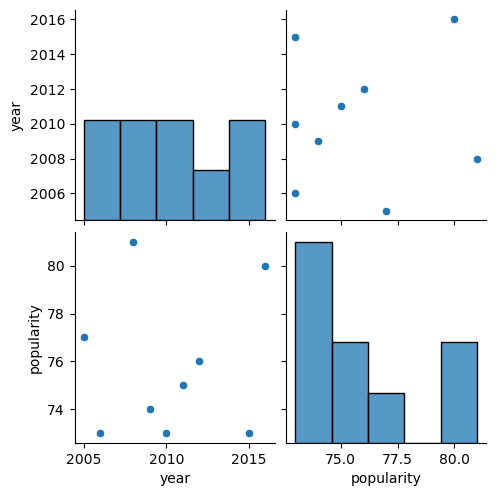

In [369]:
#Многомерный анализ популярности песен Рианны по годам
sns.pairplot(Rihanna_year)

In [ ]:
Посмотрим самые популярные песни (топ-5) по значению популярности

In [325]:
top5_popular_song = df1\
        .groupby(['song'], as_index=False) \
        .aggregate({'popularity': 'max'}) \
        .sort_values('popularity', ascending=False) 
top5_popular_song.head(5)

,song,popularity
1526,Sweater Weather,89
95,Another Love,88
1809,Without Me,87
1714,Wait a Minute!,86
1872,lovely (with Khalid),86


In [334]:
Max_popular_Sweater_Weather = df1.query ("song == 'Sweater Weather'")
Max_popular_Sweater_Weather 

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.81,1,0.0336,0.0495,0.0177,0.101,0.398,124.053,"rock, pop"


In [333]:
Max_popular_Another_Love = df1.query ("song == 'Another Love'")
Max_popular_Another_Love

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.04,0.695,0.000017,0.0944,0.131,122.769,pop


In [332]:
Max_popular_Without_Me = df1.query ("song == 'Without Me'")
Max_popular_Without_Me

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.0,0.237,0.662,112.238,hip hop


In [331]:
Max_The_Real_Slim_Shady = df1.query ("song == 'The Real Slim Shady'")
Max_The_Real_Slim_Shady

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.0302,0.0,0.0454,0.76,104.504,hip hop


In [330]:
Max_ovely_with_Khalid = df1.query ("song == 'lovely (with Khalid)'")
Max_ovely_with_Khalid

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.934,0.0,0.095,0.12,115.284,"pop, Dance/Electronic"


In [38]:
top5_song = df.iloc[[1322,1311,201, 6, 1819]]
top5_song

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


In [339]:
top5_song.popularity.max()

89

In [340]:
top5_song.popularity.min()

86

In [341]:
top5_song.popularity.median()

87.0

<Axes: xlabel='song'>

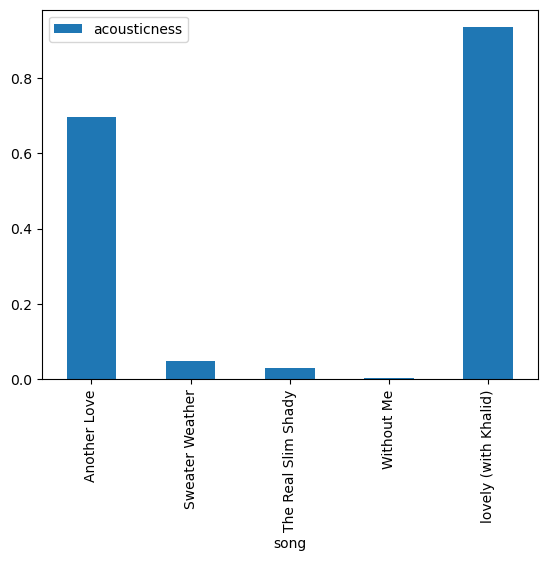

In [357]:
df_5 = top5_song.groupby('song', as_index = False).agg({'acousticness':'sum'})
df_5.plot(kind='bar', x = 'song', y = 'acousticness')

<Axes: xlabel='year'>

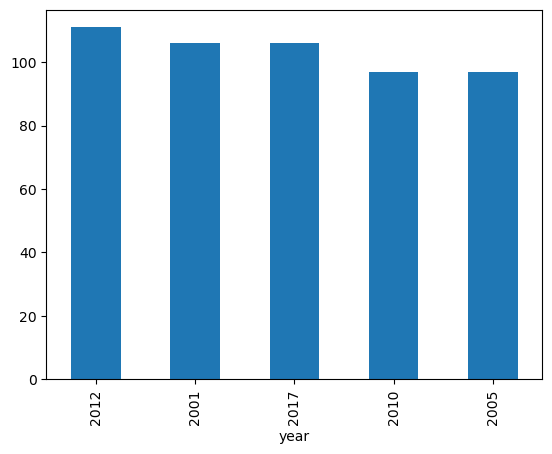

In [35]:
bar_year =df1['year'].value_counts().head(5)
bar_year.plot.bar()

<Axes: title={'center': 'Bar Chart by danceability'}, ylabel='count'>

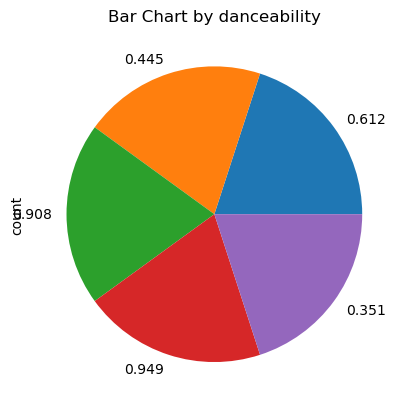

In [39]:
top5_song['danceability'].value_counts().plot(kind='pie',  title="Bar Chart by danceability")

<Axes: xlabel='popularity'>

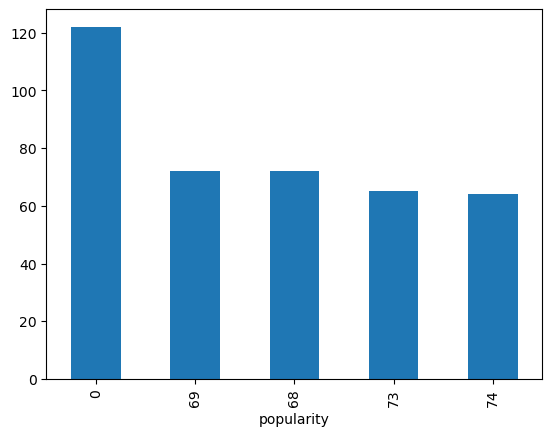

In [348]:
bar_popularity =df1['popularity'].value_counts().head(5)
bar_popularity.plot.bar()

Сравним значения песен самого популярного по распостраненности (среднее по топ 5) исполнителя и самой популярной песни (среднее по топ 5)

In [375]:
top5_artists

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1601,Drake,One Dance,173986,False,2016,84,0.792,0.625,1,-5.609,1,0.0536,0.00776,0.001800,0.3290,0.370,103.967,"hip hop, pop, R&B"
402,Britney Spears,Toxic,198800,False,2003,81,0.774,0.838,5,-3.914,0,0.1140,0.02490,0.025000,0.2420,0.924,143.040,pop
1812,Calvin Harris,One Kiss (with Dua Lipa),214846,False,2018,81,0.791,0.862,9,-3.240,0,0.1100,0.03700,0.000022,0.0814,0.592,123.994,"hip hop, pop, Dance/Electronic"
701,Rihanna,Umbrella,275986,False,2008,81,0.583,0.829,1,-4.603,1,0.1340,0.00864,0.000000,0.0426,0.575,174.028,"hip hop, pop, R&B"


In [376]:
top5_song

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"


Обьединим две таблицы - таблицу с самой популярной песней и таблицу самого распостраненного исполнителя:

In [378]:
merged_df = pd.merge(top5_artists, top5_song, on= 'artist')

In [379]:
merged_df

,artist,song_x,duration_ms_x,explicit_x,year_x,popularity_x,danceability_x,energy_x,key_x,loudness_x,mode_x,speechiness_x,acousticness_x,instrumentalness_x,liveness_x,valence_x,tempo_x,genre_x,song_y,duration_ms_y,explicit_y,year_y,popularity_y,danceability_y,energy_y,key_y,loudness_y,mode_y,speechiness_y,acousticness_y,instrumentalness_y,liveness_y,valence_y,tempo_y,genre_y
0,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.0,0.237,0.662,112.238,hip hop,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.0,0.2370,0.662,112.238,hip hop
1,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.0,0.237,0.662,112.238,hip hop,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.0,0.0454,0.760,104.504,hip hop


Формула идеального трека:
Самый часто встречающийся исполнитель с самой популярной песней -  	Eminem	"Without Me"

In [ ]:
#выведем топ-10 песен по популярности

In [45]:
top10_song = df1.sort_values (by = 'popularity', ascending = False )                           
top10_song

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop


In [57]:
#создадим таблицу с топ 10 самыми популярными песными, исключая все остальные
top10_song_popularity = top10_song.head(10)
top10_song_popularity

,artist,song,duration_ms,explicit,year,popularity,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,genre
1322,The Neighbourhood,Sweater Weather,240400,False,2013,89,0.612,0.807,10,-2.810,1,0.0336,0.04950,0.017700,0.1010,0.398,124.053,"rock, pop"
1311,Tom Odell,Another Love,244360,True,2013,88,0.445,0.537,4,-8.532,0,0.0400,0.69500,0.000017,0.0944,0.131,122.769,pop
201,Eminem,Without Me,290320,True,2002,87,0.908,0.669,7,-2.827,1,0.0738,0.00286,0.000000,0.2370,0.662,112.238,hip hop
1819,Billie Eilish,lovely (with Khalid),200185,False,2018,86,0.351,0.296,4,-10.109,0,0.0333,0.93400,0.000000,0.0950,0.120,115.284,"pop, Dance/Electronic"
1613,WILLOW,Wait a Minute!,196520,False,2015,86,0.764,0.705,3,-5.279,0,0.0278,0.03710,0.000019,0.0943,0.672,101.003,"pop, R&B, Dance/Electronic"
6,Eminem,The Real Slim Shady,284200,True,2000,86,0.949,0.661,5,-4.244,0,0.0572,0.03020,0.000000,0.0454,0.760,104.504,hip hop
1514,Avicii,The Nights,176658,False,2014,85,0.527,0.835,6,-5.298,1,0.0433,0.01660,0.000000,0.2490,0.654,125.983,"pop, Dance/Electronic"
1512,The Neighbourhood,Daddy Issues,260173,False,2015,85,0.588,0.521,10,-9.461,1,0.0329,0.06780,0.149000,0.1230,0.337,85.012,"rock, pop"
1227,Bruno Mars,Locked out of Heaven,233478,False,2012,85,0.726,0.698,5,-4.165,1,0.0431,0.04900,0.000000,0.3090,0.867,143.994,pop
1999,Post Malone,Circles,215280,False,2019,85,0.695,0.762,0,-3.497,1,0.0395,0.19200,0.002440,0.0863,0.553,120.042,hip hop


In [58]:
#посчитаем средние по каждому числовому столбцу
top10_mean = top10_song_popularity[['duration_ms', 'popularity', 'popularity', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]]. mean ()
top10_mean
#Это значения по топ 10 самым популярным песням

duration_ms         234157.400000
popularity              86.200000
popularity              86.200000
danceability             0.656500
energy                   0.649100
key                      5.400000
mode                     0.600000
speechiness              0.042450
acousticness             0.207406
instrumentalness         0.016918
liveness                 0.143440
valence                  0.515400
tempo                  115.488200
dtype: float64

In [59]:
#выведем среднее по числовым столбцам по всем песням
all_mean = df1[['duration_ms', 'popularity', 'popularity', 'danceability', 'energy', 'key', 'mode', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'valence', 'tempo' ]]. mean ()
all_mean
#это значения по всем песням

duration_ms         228647.375200
popularity              59.517829
popularity              59.517829
danceability             0.668402
energy                   0.722988
key                      5.351783
mode                     0.554018
speechiness              0.104263
acousticness             0.128630
instrumentalness         0.015738
liveness                 0.182079
valence                  0.554258
tempo                  120.201733
dtype: float64

In [63]:
#создадим новую таблицу со значениями по топ 10 самым популярным песням и  по всем песням для того, чтобы посмотреть различия 
cancat_tab = pd.concat([top10_mean, all_mean], sort = False, axis = 1)
cancat_tab

,0,1
duration_ms,234157.400000,228647.375200
popularity,86.200000,59.517829
popularity,86.200000,59.517829
danceability,0.656500,0.668402
energy,0.649100,0.722988
key,5.400000,5.351783
mode,0.600000,0.554018
speechiness,0.042450,0.104263
acousticness,0.207406,0.128630
instrumentalness,0.016918,0.015738
